In [1]:
# Nome aluno 1: Leão Pereira
# RA aluno 1: 22200115

# Nome aluno 2: João Gustavo
# RA aluno 2: 22205171

# Nome aluno 3: Hezio Silva
# RA aluno 3: 22204407

# **Instruções para a Prova**

**Antes de iniciar, preencha o Nome e RA no bloco de código acima.**

### **Envio da Prova por apenas 1 integrante do grupo no formulário** https://forms.gle/TM3Lb9Cia2tk64Gy6

A prova deve ser realizada e enviada seguindo estas diretrizes:

**Não renomei o arquivo. Deve ser enviado com o nome "``Prova 1.ipynb``"**

1. **Composição do Grupo:**
   - A prova pode ser realizada individualmente ou em grupos de até 3 integrantes.

2. **Consultas:**
   - É permitido consultar materiais das aulas anteriores e anotações próprias.

3. **Integridade Acadêmica:**
   - Será atribuída nota zero à prova de alunos que forem flagrados compartilhando código com outros grupos, utilizando o Google ou Chat GPT durante a prova.
   - Alunos que enviarem prova de fraude acadêmica por outros grupos, mediante prova fotográfica enviada por e-mail, receberão nota máxima (SS). A identidade do informante será mantida em sigilo.

4. **Intervalo:**
   - Não haverá intervalos. Após a finalização da prova, o aluno estará livre para sair.

5. **Entrega da Prova:**
   - A prova deve ser entregue mantendo todos os blocos de markdown e de código originais, sem adicionar blocos adicionais. Blocos de código extras podem ser usados durante o desenvolvimento, mas a versão final deve conter apenas os blocos fornecidos inicialmente.
   - Todas as saídas dos blocos de código devem ser mantidas no envio (Ex: As métricas e o Gráfico)

6. **Atenção:**
   - Respostas corretas colocadas nas seções erradas não serão consideradas. É essencial colocar cada resposta na seção correspondente à sua questão.

**Boa sorte!**


# Importe todas as bibliotecas no bloco de código abaixo
- Cada bibliotecas importada e não utilizada irá reduzir meio ponto da nota.
- Cada bibliotecas importada mais de uma vez irá reduzir meio ponto da nota.
- Cada bibliotecas importada fora do bloco de código abaixo irá reduzir meio ponto da nota.

In [73]:
# Importe as bibliotecas neste bloco de código
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\__init__.py)

# 1 - Leia a base 'dados_corretor_imoveis.csv' e faça o tratamento de dados descrito abaixo:

In [17]:
# 1 - Desenvolva o Código aqui!
imoveis = pd.read_csv('dados_corretor_imoveis.csv')

In [18]:
imoveis.dtypes

status        object
quartos      float64
banheiros    float64
area_lote    float64
estado        object
area_casa    float64
valor        float64
dtype: object

- A - Crie uma coluna chamada "vendido" com valor `0` se o valor de status for `for_sale` e `1` se for `sold`. (apague a coluna status)



In [19]:
# A - Desenvolva o Código aqui!
imoveis['status'].nunique()

2

In [20]:
imoveis['vendido']=imoveis.loc[imoveis['status'] == 'for_sale', 'status'] = 0
imoveis['vendido']=imoveis.loc[imoveis['status'] == 'sold', 'status'] = 1

In [21]:
imoveis = imoveis.drop(['status'], axis = 1)

- B - Tire todas as casas decimais das colunas numéricas



In [22]:
# B - Desenvolva o Código aqui!
# B - Desenvolva o Código aqui!
colunas_numericas = imoveis.select_dtypes(include=['float64', 'float32']).columns

# Agora, vamos converter essas colunas para inteiros, removendo as casas decimais
for coluna in colunas_numericas:
    imoveis[coluna] = imoveis[coluna].astype(int)

# Verifique o resultado
print(imoveis.head())

   quartos  banheiros  area_lote       estado  area_casa   valor  vendido
0        3          2        485  Puerto Rico         85  105000        1
1        4          2        323  Puerto Rico        141   80000        1
2        2          1        607  Puerto Rico         69   67000        1
3        4          2        404  Puerto Rico        167  145000        1
4        4          3       1861  Puerto Rico        234  179000        1


- C - Crie uma coluna binária (0 ou 1) para cada um dos 10 estados mais frequentes na "coluna ", identifique primeiramente os 10 estados com maior número de ocorrências. Em seguida, para cada um desses estados, crie uma nova coluna no DataFrame, nomeando-a com o nome do estado, e atribua o valor 1 se a casa estiver nesse estado e 0 caso contrário. Casas localizadas fora desses 10 estados devem ter o valor 0 em todas essas novas colunas. Finalize removendo a coluna "estado" do DataFrame.

In [23]:
# C - Desenvolva o Código aqui!
# Identificar os 10 estados mais frequentes
estados_mais_frequentes = imoveis['estado'].value_counts().head(10).index

# Colunas binárias para cada um dos 10 estados mais frequentes
for estado in estados_mais_frequentes:
    imoveis[estado] = imoveis['estado'].apply(lambda x: 1 if x == estado else 0)

# Remover a coluna 'estado'
imoveis.drop('estado', axis=1, inplace=True)

print(imoveis.head())

   quartos  banheiros  area_lote  area_casa   valor  vendido  California  \
0        3          2        485         85  105000        1           0   
1        4          2        323        141   80000        1           0   
2        2          1        607         69   67000        1           0   
3        4          2        404        167  145000        1           0   
4        4          3       1861        234  179000        1           0   

   Texas  Florida  Arizona  Pennsylvania  New York  Georgia  Illinois  \
0      0        0        0             0         0        0         0   
1      0        0        0             0         0        0         0   
2      0        0        0             0         0        0         0   
3      0        0        0             0         0        0         0   
4      0        0        0             0         0        0         0   

   Washington  Virginia  
0           0         0  
1           0         0  
2           0         0  


- D - Separe os dados em X (os atributos) e y (a coluna valor)



In [24]:
# D - Desenvolva o Código aqui!
X = imoveis.drop(['valor'], axis = 1)
y = imoveis[['valor']]


- E - Separe os dados em treinamento (30%), validação (20%) e teste (50%).

In [25]:
# E - Desenvolva o Código aqui!
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.4, random_state=42)


- F - Normalize  os dados com Standard Scale

In [26]:
# F - Desenvolva o Código aqui!
scaler_features = StandardScaler()

# Fit no conjunto de treinamento
scaler_features.fit(X_train)

# Transformar os conjuntos de dados
X_train_scaled = scaler_features.transform(X_train)
X_val_scaled = scaler_features.transform(X_val)
X_test_scaled = scaler_features.transform(X_test)

# Normalização dos dados de saída (y) para Regressão
scaler_reg = StandardScaler()
y_train_scaled = scaler_reg.fit_transform(Y_train)
y_val_scaled = scaler_reg.transform(Y_val)
y_test_scaled = scaler_reg.transform(Y_test)

# 2 Defina e compile um modelo para prever o valor com as seguintes caracterìsticas:
- Para o modelo:
    - Tenha 5 camadas ocultas, respectivamente com 128, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao Tangente Hiperbólica nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador rmsprop;
    - O loss adequado para o tipo de previsão;
    - A métrica de erro médio absoluto;
- Chame o modelo de "`model_1`";

In [27]:
# 2 - Desenvolva o Código aqui!from tensorflow.keras.models import Sequential

# Modelo sequencial
model_1 = Sequential()

# Camadas ocultas com a função de ativação Tangente Hiperbólica
model_1.add(Dense(128, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model_1.add(Dense(64, activation='tanh'))
model_1.add(Dense(32, activation='tanh'))
model_1.add(Dense(16, activation='tanh'))
model_1.add(Dense(8, activation='tanh'))
# Camada de saída
model_1.add(Dense(1))

# Compilação o modelo com o otimizador RMSprop
model_1.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Resumo do modelo
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2048      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057

# 3 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.3, paciência de 3 e valor mínimo para 0.000001, monitorando o loss de validação;
    - Parada antecipada do modelo se ficar 10 épocas sem melhorar o loss de validação
- Treine o modelo por 20 épocas;
- Passe 256 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [28]:
# 3 - Desenvolva o Código aqui!
# Callback para reduzir a taxa de aprendizado
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=0.000001, verbose=1)

# Callback para parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Definir os callbacks na lista
callbacks_list = [reduce_lr, early_stopping]

# Treinar o modelo
history = model_1.fit(
    X_train_scaled, y_train_scaled,
    epochs=20,
    batch_size=256,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=callbacks_list,
    verbose=1
)

Epoch 1/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9438 - mean_absolute_error: 0.0963 - val_loss: 0.0916 - val_mean_absolute_error: 0.0932 - lr: 0.0010
Epoch 2/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9380 - mean_absolute_error: 0.0919 - val_loss: 0.0874 - val_mean_absolute_error: 0.0860 - lr: 0.0010
Epoch 3/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9360 - mean_absolute_error: 0.0914 - val_loss: 0.0898 - val_mean_absolute_error: 0.1039 - lr: 0.0010
Epoch 4/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9352 - mean_absolute_error: 0.0918 - val_loss: 0.0868 - val_mean_absolute_error: 0.0907 - lr: 0.0010
Epoch 5/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9344 - mean_absolute_error: 0.0917 - val_loss: 0.0868 - val_mean_absolute_error: 0.0860 - lr: 0.0010
Epoch 6/20
2658/2658 [==============================] - 6s 2ms/step - loss: 0.9338 - mean_absolute_error:

# 4 - Exiba os valores de loss e erro médio absoluto de validação e treinamento ao longo das épocas.

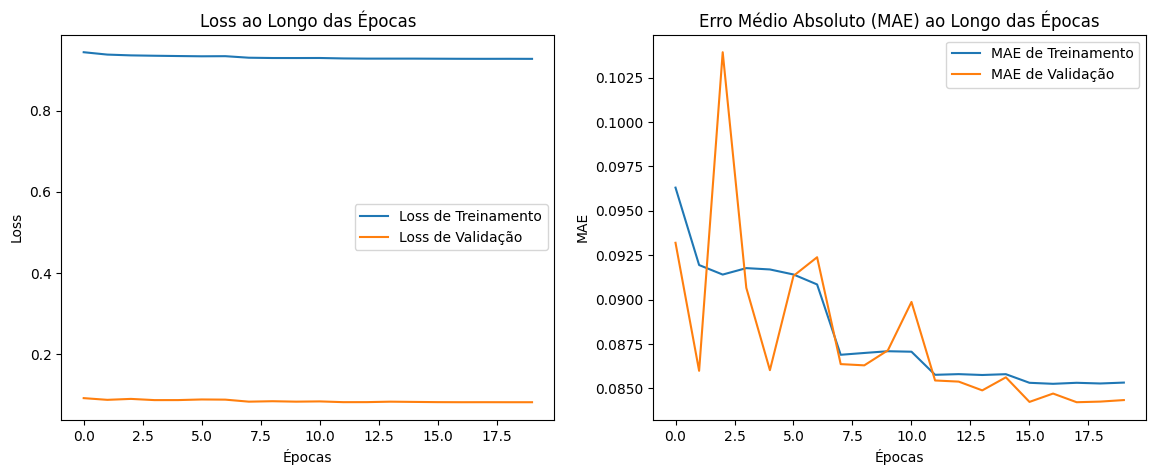

In [29]:
# 4 - Desenvolva o Código aqui!
# Plotar o loss de treinamento e validação
plt.figure(figsize=(14, 5))

# Loss de treinamento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Loss ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Erro médio absoluto (MAE) de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE de Treinamento')
plt.plot(history.history['val_mean_absolute_error'], label='MAE de Validação')
plt.title('Erro Médio Absoluto (MAE) ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()


# 5 - Calcule o MSE, RMSE e MAE para os dados de teste. 
- Adeque os valores para que as métricas sejam geradas com os valores reais. 

In [75]:
# Avaliando o modelo no conjunto de teste
y_pred = model_1.predict(X_test_scaled)

# Desnormalizando as previsões e os valores de y_test
y_pred_desnorm = scaler_reg.inverse_transform(y_pred)
y_test_desnorm = scaler_reg.inverse_transform(y_test_scaled)

# Calculando métricas de regressão com os dados desnormalizados
mse = mean_squared_error(y_test_desnorm, y_pred_desnorm)
mae = mean_absolute_error(y_test_desnorm, y_pred_desnorm)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


8505/8505 [==============================] - 8s 987us/step
MSE: 693245979291.2477
MAE: 244450.11040107216
RMSE: 832613.9437285733


# Extra Valendo 1 ponto:
- Crie um gráfico comparando os valores reais e valores preditos;
- Para o gráfico ficar viável, utilize apenas as primeiras 200 amostras;
- Para melhorar a visualização do gráfico, coloque os dados em ordem crescente pelo valor real.

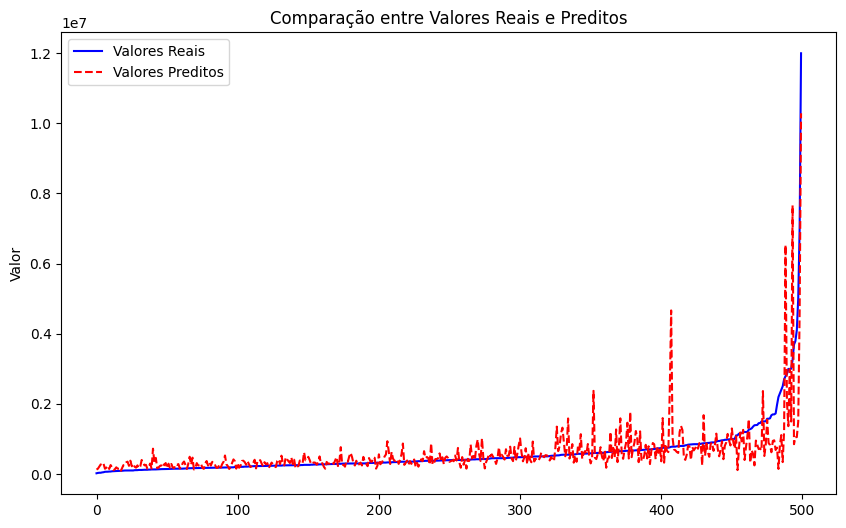

In [77]:
# Desenvolva o Código aqui!

# Criando um DataFrame com os valores preditos e reais
df_results = pd.DataFrame({'Valores Reais': y_test_desnorm.flatten(), 'Valores Preditos': y_pred_desnorm.flatten()})
df_results = df_results.sample(frac=1, random_state=70)
df_results = df_results[:500]
# Ordenando o DataFrame pelos valores reais
df_results_sorted = df_results.sort_values('Valores Reais').reset_index(drop=True)

# Plotando os valores reais e os preditos
plt.figure(figsize=(10, 6))
plt.plot(df_results_sorted.index, df_results_sorted['Valores Reais'], label='Valores Reais', color='blue')
plt.plot(df_results_sorted.index, df_results_sorted['Valores Preditos'], label='Valores Preditos', color='red', linestyle='--')
plt.title('Comparação entre Valores Reais e Preditos')
plt.ylabel('Valor')
plt.legend()
plt.show()

# 6 - Leia a base de dados metaverse_transactions_dataset.csv e faça o tratamento de dados abaixo:


In [57]:
# 6 - Desenvolva o Código aqui!
dfMetaverse = pd.read_csv('metaverse_transactions_dataset.csv')

dfMetaverse.head() 

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


- A - Apague as colunas timestamp, sending_address, receiving_address e purchase_pattern


In [58]:
# A - Desenvolva o Código aqui!
dfMetaverse.drop(['timestamp','sending_address', 'receiving_address', 'purchase_pattern'], axis = 1, inplace = True)

- B - Transforme as colunas location_region e ip_prefix, com get dummies ou one_hot _encoder (ou com o loc) de forma a criar uma coluna binária para cada possível valor. Por fim apague as colunas originais (se ainda existirem)


In [59]:
# B - Desenvolva o Código aqui!
dfMetaverse = pd.get_dummies(dfMetaverse, columns=['location_region', 'ip_prefix'])

# fazendo dessa forma já foi apagado as originais, por isso n fiz um drop

- C - Transforme a coluna age_group em numérica transformando os valores new para 0, established para 1 e veteran 22


In [60]:
# C - Desenvolva o Código aqui!

mapping = {'new': 0, 'established': 1, 'veteran': 2}
dfMetaverse['age_group'] = dfMetaverse['age_group'].map(mapping)

- D - Transforme a coluna anomaly em numérica transformando os valores low_risk para 0, moderate_risk para 1 e high_risk 2

In [61]:
# D - Desenvolva o Código aqui!

mapping = {'low_risk': 0, 'moderate_risk': 1, 'high_risk': 2}
dfMetaverse['anomaly'] = dfMetaverse['anomaly'].map(mapping)


- E - Separe os dados em X e y (transaction_type)

In [62]:
# E - Desenvolva o Código aqui!

X = dfMetaverse.drop(columns=['transaction_type'])
y = dfMetaverse['transaction_type']

- F - Separe os dados em treinamento (70%), validação (15%) e teste (15%)

In [63]:
# F - Desenvolva o Código aqui!
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

- G - Normalize os dados com MinMaxScaler

In [64]:
# G - Desenvolva o Código aqui!

# Normaliza os dados de X
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_val = scaler_x.transform(X_val)
X_test = scaler_x.transform(X_test)


- H - Transforme os dados de y para se adequar a uma classificação multiclasse 

In [65]:
# H - Desenvolva o Código aqui!

# Converter rótulos de classe para inteiros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# 7 Defina e compile um modelo para prever o tipo da transação com as seguintes características:
- Para o modelo:
    - Tenha 6 camadas ocultas, respectivamente com 64, 64, 64, 32, 16 e 8 neurônios;
    - Use a função de ativaçao relu nas camadas ocultas;
- Para a compilação do modelo:
    - O Otimizador adam;
    - O loss adequado para o tipo de previsão;
    - A métrica de acurácia;
- Chame o modelo de "`model_2`";

In [66]:
# 7 - Desenvolva o Código aqui!

input_dim = X_train.shape[1]

model_2 = Sequential()

model_2.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(5, activation='softmax'))

model_2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# 8 - Treinamento do modelo:
- Defina os callbacks:
    - para reduzir a taxa de aprendizado com fator de 0.35, paciência de 4 e valor mínimo para 0.00001, monitorando a acurácia de validação;
    - Parada antecipada do modelo se ficar 15 épocas sem melhorar o loss de validação
- Treine o modelo por 150 épocas;
- Passe 128 amostras por vez na rede;
- Use os dados de validação;
- Use os calbacks definidos;
- Coloque para mostrar as épocas dutante o treinamento;
- Salve os dados históricos do treinamento para posterior análise.

In [67]:
# 8 - Desenvolva o Código aqui!
early_stop = EarlyStopping(patience=15, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.35, min_lr=0.00001)

history_class = model_2.fit(X_train, y_train_one_hot, batch_size=128,
                            epochs=150, validation_data=[X_val, y_val_one_hot],
                            callbacks=[early_stop, reduce_lr],
                            verbose=1)


Epoch 1/150
430/430 [==============================] - 2s 2ms/step - loss: 0.4796 - accuracy: 0.7899 - val_loss: 0.1730 - val_accuracy: 0.9163 - lr: 0.0010
Epoch 2/150
430/430 [==============================] - 1s 2ms/step - loss: 0.1583 - accuracy: 0.9242 - val_loss: 0.1434 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 3/150
430/430 [==============================] - 1s 2ms/step - loss: 0.1385 - accuracy: 0.9330 - val_loss: 0.1345 - val_accuracy: 0.9334 - lr: 0.0010
Epoch 4/150
430/430 [==============================] - 1s 2ms/step - loss: 0.1286 - accuracy: 0.9380 - val_loss: 0.1304 - val_accuracy: 0.9313 - lr: 0.0010
Epoch 5/150
430/430 [==============================] - 1s 2ms/step - loss: 0.1192 - accuracy: 0.9433 - val_loss: 0.1278 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 6/150
430/430 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9444 - val_loss: 0.1148 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 7/150
430/430 [==============================] - 1s 2ms/st

# 9 - Exiba os valores de loss e acurácia de validação e treinamento ao longo das épocas.

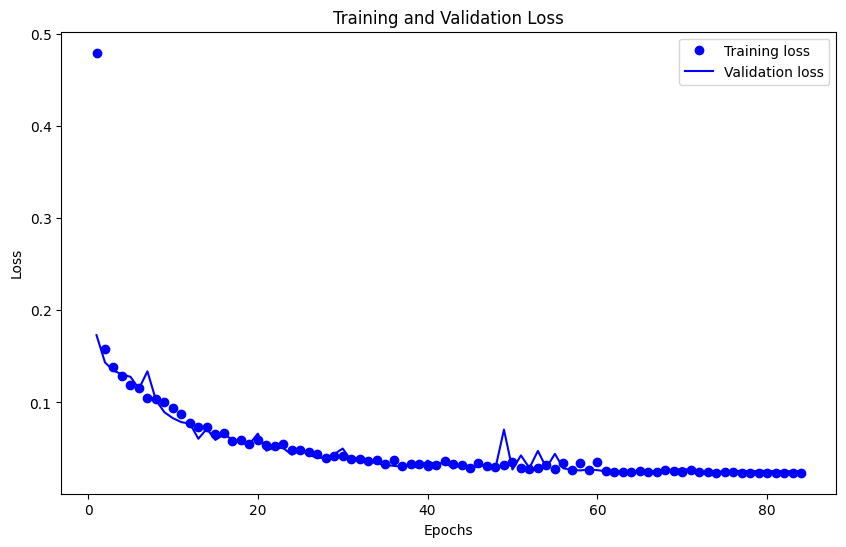

In [68]:
# 9 - Desenvolva o Código aqui!
loss = history_class.history['loss']
val_loss = history_class.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 10 - Exiba as métricas de validaçao do modelo abaixo:

In [69]:
# Faça a previsão neste bloco de código


- A - Relatório de Classificação


In [70]:
# A - Desenvolva o Código aqui!


- B - F1 Score


In [71]:
# B - Desenvolva o Código aqui!


- C - Matriz de confusão com gráfico de calor

In [72]:
# C - Desenvolva o Código aqui!
